model: SVM

y_value: hp

pre processing: 灰階 -> resize -> HOG

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

import cv2
from skimage import data, color, feature

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, plot_confusion_matrix, confusion_matrix

In [2]:
def load_img(path, csv_path):
    df = pd.read_csv(csv_path)
    img_list = df['image'].tolist()
    img_data_list = []
    for item in tqdm(img_list):
        img_path = path + item
        img = cv2.imread(img_path)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        gray = cv2.resize(gray, (89, 109), interpolation=cv2.INTER_AREA)
        fd, hog_image = feature.hog(gray, visualize=True)
        img_data_list.append(hog_image.flatten())
    return img_data_list

In [3]:
csv_path = "all_records.csv"
df = pd.read_csv(csv_path)
print(df.head)
img_info = load_img("./all_images/static/img/need_scored/", csv_path)

<bound method NDFrame.head of       name                image  hp  pa  ma  sp  cr
0     shih  nba_players_290.png  10   7   3   9   8
1     shih           032621.jpg   4   5   8   9   7
2     shih  nba_players_429.png   6   5   6   7   5
3     liao           090899.jpg   5   4   7   4   4
4     liao           095790.jpg   6   5   5   3   7
...    ...                  ...  ..  ..  ..  ..  ..
1687  shih           181096.jpg   7   8   3   7   6
1688  shih           070158.jpg   5   3   4   3   4
1689  shih           182295.jpg   3   1   4   3   1
1690  shih           145346.jpg   3   2   4   3   2
1691  shih           131518.jpg   7   6   5   6   5

[1692 rows x 7 columns]>


In [4]:
print(img_info[0].shape)

(9701,)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(img_info, df['hp'], test_size=0.3,random_state=109)

In [6]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)

print(clf.score(X_train,y_train))
print(clf.score(X_test, y_test))

0.39864864864864863
0.21653543307086615


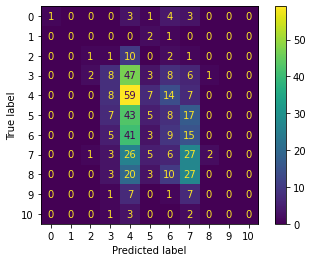

In [7]:
plot_confusion_matrix(clf, X_test, y_test)
plt.show()